In [9]:
!pip install overpy
!pip install pandas
!pip install geopy
import overpy
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np

def geocode_address(address):
    geolocator = Nominatim(user_agent="your_app_name")
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude)


def get_nearby_amenities(address):
    try:
        coordinates = geocode_address(address)

        overpass_query = f"""
            node(around:500, {coordinates[0]}, {coordinates[1]})
            ["amenity"];
            out;
        """

        api = overpy.Overpass()
        result = api.query(overpass_query)

        amenities = [node.tags.get('amenity', 'N/A') for node in result.nodes]
        return ", ".join(amenities)
    
    except Exception as e:
        return str(e)

def process_excel(input_file, output_file):
    df = pd.read_excel(input_file)

    df['Amenities'] = df['Address'].apply(get_nearby_amenities)

    df.to_csv(output_file, index=False)

# Example usage
input_excel_file = "input_file.xlsx"
output_csv_file = "output_amenities.csv"
process_excel(input_excel_file, output_csv_file)

In [10]:
# Create data frame
csv = pd.read_csv("output_amenities.csv", encoding='utf-8')
amt = pd.DataFrame(csv)

# Extracting all categories from amenities 
amenities_mentioned = amt["Amenities"].str.split().explode().unique().tolist()

# Print list of unique amenities
print(amenities_mentioned)

['post_box,', 'recycling,', 'fast_food,', 'restaurant,', 'police,', 'bar,', 'cafe,', 'fire_station,', 'clinic,', 'bank,', 'bicycle_parking,', 'parking,', 'toilets,', 'lockers,', 'bench,', 'drinking_water,', 'bicycle_rental,', 'parking_entrance,', 'vending_machine,', 'piano,', 'charging_station,', 'doctors,', 'clock,', 'waste_basket,', 'boat_rental,', 'public_bookcase,', 'vending_machine', 'fuel,', 'motorcycle_parking,', 'bench', 'pharmacy,', 'pub,', 'waste_disposal,', 'ice_cream,', 'studio,', 'place_of_worship,', 'bbq,', 'taxi,', 'fountain,', 'dentist,', 'shelter,', 'arts_centre,', 'theatre,', 'kindergarten,', 'school,', 'food_court,', 'atm,', 'parking_entrance', 'townhall,', 'healthcare,', 'social_centre,', 'community_centre,', 'dental_hygienist,', 'social_facility,', 'cinema,', 'fountain', 'bureau_de_change,', 'bus_station,', 'nightclub,', 'casino,', 'coworking_space,', 'accupuncture,', 'brothel,', 'bicycle_repair_station,', 'cannabis,', 'car_rental,', 'ferry_terminal,', 'bicycle_par

In [11]:
excel = "google_maps_reviews_english_googletrans.xlsx"

# Read Excel file into DataFrame
rating_amenities = pd.read_excel(excel)

# Drop specific columns from the original DataFrame
rating_amenities = rating_amenities.drop(["name", "review_text", "location_link", "reviews_total", "review_datetime_utc", "reviews_per_score_1", "reviews_per_score_2", "reviews_per_score_3", "reviews_per_score_4", "reviews_per_score_5", "review_text_english_googletrans"], axis=1)

# Display new DataFrame
display(rating_amenities)

,place_id,rating,review_rating
0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,2
1,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,5
2,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,1
3,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,1
4,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,5
...,...,...,...
1210,ChIJ5_ZVzPwzxEcRnORjwSzG0fU,4.6,5
1211,ChIJ5_ZVzPwzxEcRnORjwSzG0fU,4.6,5
1212,ChIJ5_ZVzPwzxEcRnORjwSzG0fU,4.6,5
1213,ChIJ5_ZVzPwzxEcRnORjwSzG0fU,4.6,5


In [12]:
amenity_counts_dict = {amenity: [] for amenity in amenities_mentioned}

# Loop to count the amount of amentities per location
for amenities_str in amt["Amenities"]:
    for amenity in amenities_mentioned:
        count = amenities_str.count(amenity)
        
        amenity_counts_dict[amenity].append(count)

# Add the counts as new columns in amt
for amenity, counts in amenity_counts_dict.items():
    amt[f'{amenity}_counts'] = counts

amt["total_counts"] = amt[[f"{amenity}counts" for amenity in amenities_mentioned]].sum(axis = 1)

#Display
display(amt)

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\985757727.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amt[f'{amenity}_counts'] = counts
C:\Users\hp\AppData\Local\Temp\ipykernel_28008\985757727.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amt[f'{amenity}_counts'] = counts
C:\Users\hp\AppData\Local\Temp\ipykernel_28008\985757727.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at onc

KeyError: "None of [Index(['post_box,counts', 'recycling,counts', 'fast_food,counts',\n       'restaurant,counts', 'police,counts', 'bar,counts', 'cafe,counts',\n       'fire_station,counts', 'clinic,counts', 'bank,counts',\n       ...\n       'parcel_locker,counts', 'parkingcounts', 'events_venue,counts',\n       'charging_stationcounts', 'ticket_validator,counts',\n       'photo_booth,counts', 'hospital,counts', 'fuelcounts',\n       'playground,counts', 'balance_beamcounts'],\n      dtype='object', length=129)] are in the [columns]"

In [13]:
#add place ID
place_ID_df = pd.read_excel("input.xlsx")

# Merge DataFrames based on adress and safe place_id
merged_df = pd.merge(amt, place_ID_df, on = "Address", how = "left")

amt["place_id"] = place_ID_df.groupby("Address")["place_id"].transform("first")
display(amt)
amt.columns

C:\Users\hp\AppData\Local\Temp\ipykernel_28008\2366964882.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  amt["place_id"] = place_ID_df.groupby("Address")["place_id"].transform("first")


,Address,Amenities,"post_box,_counts","recycling,_counts","fast_food,_counts","restaurant,_counts","police,_counts","bar,_counts","cafe,_counts","fire_station,_counts",...,parking_counts,"events_venue,_counts",charging_station_counts,"ticket_validator,_counts","photo_booth,_counts","hospital,_counts",fuel_counts,"playground,_counts",balance_beam_counts,place_id
0,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,11,0,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM
1,"Joan Muyskenweg 22, 1096 CJ Amsterdam","parking, post_box, parking, fuel, charging_sta...",1,0,0,0,0,0,0,0,...,3,0,5,0,0,0,1,0,0,ChIJxZHiajgLxkcRlOo3zmIibOs
2,"Nieuwe Leeuwarderweg, 1021 BZ Amsterdam","fuel, post_box, fast_food, pharmacy, pub, pub,...",2,17,6,5,0,0,1,0,...,6,0,1,0,0,0,1,0,0,ChIJYyOpnFQIxkcRErWFhYVuAeQ
3,"Spoorslag 29, 1082 MM Amsterdam","cafe, parking, place_of_worship, restaurant, c...",1,1,5,15,0,2,16,0,...,16,0,1,0,0,0,0,0,0,EixTdGF0aW9uIFp1aWQsIDEwNzcgWFYgQW1zdGVyZGFtLC...
4,"Julianaplein Oost, 1097 DN Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,15,4,8,1,1,3,1,...,11,0,2,0,0,0,0,0,0,ChIJPd2JhH8JxkcRQ8jSHUchci0
5,"Termini 23, Amsterdam","townhall, healthcare, social_centre, dentist, ...",1,33,5,5,0,0,2,0,...,7,0,3,0,0,0,0,0,0,ChIJn0fdmPwJxkcRYe7a-6JHfpI
6,"Stationsplein 39, 1012 AB Amsterdam","restaurant, pub, pub, pub, restaurant, bureau_...",1,6,59,117,0,24,31,0,...,23,0,0,0,0,0,0,0,0,ChIJf_z8xbcJxkcRCc-nQwIMAP8
7,"Cornelis Lelylaan 35, 1062 HD Amsterdam","recycling, recycling, recycling, post_box, res...",3,29,5,3,0,0,3,0,...,6,0,0,0,0,0,0,0,0,ChIJ71V5XiPixUcRSKlH5OYy-iE
8,"Europaboulevard 4A, 1083 AD Amsterdam","theatre, conference_centre, parking, parking, ...",1,1,0,3,0,0,1,0,...,13,0,0,0,0,0,0,0,0,ChIJLWMViCIKxkcRi1ThzDUCzCo
9,"Kattenburgerstraat 5, 1018 JA Amsterdam","pub, post_box, restaurant, restaurant, restaur...",3,5,2,17,0,0,5,1,...,23,0,5,0,0,0,0,0,0,Eh85V0c3K1g4LCBBbXN0ZXJkYW0sIE5ldGhlcmxhbmRzIi...


Index(['Address', 'Amenities', 'post_box,_counts', 'recycling,_counts',
       'fast_food,_counts', 'restaurant,_counts', 'police,_counts',
       'bar,_counts', 'cafe,_counts', 'fire_station,_counts',
       ...
       'parking_counts', 'events_venue,_counts', 'charging_station_counts',
       'ticket_validator,_counts', 'photo_booth,_counts', 'hospital,_counts',
       'fuel_counts', 'playground,_counts', 'balance_beam_counts', 'place_id'],
      dtype='object', length=132)

In [16]:
#merge the two to have ratings and amenities in one DataFrame
merged_df2 = pd.merge(amt, rating_amenities, on = "place_id", how = "left")

display(merged_df2)

# Print the list of all column names in the DataFrame
all_columns = merged_df2.columns.tolist()
print("List of all columns in the DataFrame:")
print(all_columns)


,Address,Amenities,"post_box,_counts","recycling,_counts","fast_food,_counts","restaurant,_counts","police,_counts","bar,_counts","cafe,_counts","fire_station,_counts",...,charging_station_counts,"ticket_validator,_counts","photo_booth,_counts","hospital,_counts",fuel_counts,"playground,_counts",balance_beam_counts,place_id,rating,review_rating
0,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,2.0
1,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,5.0
2,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,1.0
3,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,1.0
4,"Julianaplein 1, Amsterdam","post_box, recycling, fast_food, restaurant, re...",4,14,3,8,1,1,3,1,...,1,0,0,0,0,0,0,ChIJCwHQg38JxkcRJeVtM9mPCnM,3.3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,"Busplein 16, 1315 KR Almere","parking, post_box, fast_food, fast_food, fast_...",1,0,20,15,0,3,5,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
703,"Stationsplein 131, 3511 ED Utrecht","parking, parking, parking, fast_food, fast_foo...",5,3,36,81,1,3,28,0,...,6,72,1,0,0,0,0,NaN,NaN,NaN
704,"Universiteitsweg, 3584 CT Utrecht","pub, bench, hospital, parking_entrance, bench,...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,NaN,NaN,NaN
705,"Griffioenlaan 1BIS, 3526 LA Utrecht","parking, post_box, parking_entrance, parking_e...",1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,NaN,NaN,NaN


List of all columns in the DataFrame:
['Address', 'Amenities', 'post_box,_counts', 'recycling,_counts', 'fast_food,_counts', 'restaurant,_counts', 'police,_counts', 'bar,_counts', 'cafe,_counts', 'fire_station,_counts', 'clinic,_counts', 'bank,_counts', 'bicycle_parking,_counts', 'parking,_counts', 'toilets,_counts', 'lockers,_counts', 'bench,_counts', 'drinking_water,_counts', 'bicycle_rental,_counts', 'parking_entrance,_counts', 'vending_machine,_counts', 'piano,_counts', 'charging_station,_counts', 'doctors,_counts', 'clock,_counts', 'waste_basket,_counts', 'boat_rental,_counts', 'public_bookcase,_counts', 'vending_machine_counts', 'fuel,_counts', 'motorcycle_parking,_counts', 'bench_counts', 'pharmacy,_counts', 'pub,_counts', 'waste_disposal,_counts', 'ice_cream,_counts', 'studio,_counts', 'place_of_worship,_counts', 'bbq,_counts', 'taxi,_counts', 'fountain,_counts', 'dentist,_counts', 'shelter,_counts', 'arts_centre,_counts', 'theatre,_counts', 'kindergarten,_counts', 'school,_cou

In [17]:
merged_df2.head()
merged_df2.info()
print(merged_df2.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Columns: 134 entries, Address to review_rating
dtypes: float64(2), int64(129), object(3)
memory usage: 740.3+ KB
Address                 object
Amenities               object
post_box,_counts         int64
recycling,_counts        int64
fast_food,_counts        int64
                        ...   
playground,_counts       int64
balance_beam_counts      int64
place_id                object
rating                 float64
review_rating          float64
Length: 134, dtype: object


In [19]:
# Correlation between features and ratings
# List of features for correlation analysis
selected_features = ['Address', 'Amenities', 'post_box,_counts', 'recycling,_counts', 'fast_food,_counts', 'restaurant,_counts', 'police,_counts', 'bar,_counts', 'cafe,_counts', 'fire_station,_counts', 'clinic,_counts', 'bank,_counts', 'bicycle_parking,_counts', 'parking,_counts', 'toilets,_counts', 'lockers,_counts', 'bench,_counts', 'drinking_water,_counts', 'bicycle_rental,_counts', 'parking_entrance,_counts', 'vending_machine,_counts', 'piano,_counts', 'charging_station,_counts', 'doctors,_counts', 'clock,_counts', 'waste_basket,_counts', 'boat_rental,_counts', 'public_bookcase,_counts', 'vending_machine_counts', 'fuel,_counts', 'motorcycle_parking,_counts', 'bench_counts', 'pharmacy,_counts', 'pub,_counts', 'waste_disposal,_counts', 'ice_cream,_counts', 'studio,_counts', 'place_of_worship,_counts', 'bbq,_counts', 'taxi,_counts', 'fountain,_counts', 'dentist,_counts', 'shelter,_counts', 'arts_centre,_counts', 'theatre,_counts', 'kindergarten,_counts', 'school,_counts', 'food_court,_counts', 'atm,_counts', 'parking_entrance_counts', 'townhall,_counts', 'healthcare,_counts', 'social_centre,_counts', 'community_centre,_counts', 'dental_hygienist,_counts', 'social_facility,_counts', 'cinema,_counts', 'fountain_counts', 'bureau_de_change,_counts', 'bus_station,_counts', 'nightclub,_counts', 'casino,_counts', 'coworking_space,_counts', 'accupuncture,_counts', 'brothel,_counts', 'bicycle_repair_station,_counts', 'cannabis,_counts', 'car_rental,_counts', 'ferry_terminal,_counts', 'bicycle_parking_counts', 'conference_centre,_counts', 'parking_space,_counts', 'college,_counts', 'cafe_counts', 'archive,_counts', 'university,_counts', 'courthouse,_counts', 'childcare,_counts', 'music_school,_counts', 'recycling_counts', 'post_office,_counts', 'marketplace,_counts', 'restaurant_counts', 'stripclub,_counts', 'car_sharing,_counts', 'library,_counts', 'veterinary,_counts', 'station,_counts', 'training,_counts', 'car_wash,_counts', 'music_studio,_counts', 'karaoke_box,_counts', 'loading_dock,_counts', 'warehouse,_counts', 'health_centre,_counts', 'locker,_counts', 'luggage_locker,_counts', 'chiropractic,_counts', 'mailboxes,_counts', 'office_units,_counts', 'meeting_centre,_counts', 'cooking_school,_counts', 'K+R,_counts', 'freezone,_counts', 'drinking_water_counts', 'parcel_locker,_counts', 'parking_counts', 'events_venue,_counts', 'charging_station_counts', 'ticket_validator,_counts', 'photo_booth,_counts', 'hospital,_counts', 'fuel_counts', 'playground,_counts', 'balance_beam_counts']

# Ensure unique elements in the list
selected_features = list(set(selected_features))

# Calculate correlation matrix for selected features
correlation_matrix_selected = merged_df2[selected_features + ['rating']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix_selected)

# Find features with the highest correlation with ratings
highest_correlation_selected = correlation_matrix_selected['rating'].abs().sort_values(ascending=False)
print("\nFeatures with the highest correlation with ratings:")
print(highest_correlation_selected)

# Print the first 50 highest correlations with ratings. There are past 700 rows, so it should follow the general rule of thumb
# If we only use 50 columns
print("\nTop 50 Features with the Highest Correlation with Ratings:")
print(highest_correlation_selected.head(50))

ValueError: could not convert string to float: 'post_box, recycling, fast_food, restaurant, recycling, post_box, recycling, fast_food, post_box, recycling, recycling, recycling, recycling, recycling, recycling, recycling, recycling, police, restaurant, bar, cafe, fast_food, fire_station, clinic, cafe, bank, bicycle_parking, parking, bicycle_parking, recycling, toilets, lockers, cafe, restaurant, bench, bench, bench, bench, recycling, recycling, bicycle_parking, drinking_water, bench, bench, bench, bench, bench, restaurant, restaurant, bicycle_parking, bicycle_parking, bicycle_rental, parking, parking_entrance, parking_entrance, bench, bench, bench, vending_machine, vending_machine, bench, bench, bench, bench, bench, piano, toilets, charging_station, doctors, bench, restaurant, restaurant, bench, bench, bench, bench, bench, parking, bench, bench, bench, bench, drinking_water, bench, bench, bench, clock, clock, clock, bank, waste_basket, boat_rental, post_box, public_bookcase, bicycle_parking, restaurant, bench, bench, bench, bench, bench, bench, bench, vending_machine'

In [20]:
# Replace NaN values with 0 in the entire DataFrame
merged_df2_no_nan = merged_df2.fillna(0)

# Calculate correlation matrix for all columns (including those with NaN values replaced by 0)
correlation_matrix_all = merged_df2_no_nan.corr()

# Display the correlation matrix for all columns
print("Correlation Matrix (including columns with NaN values replaced by 0):")
#print(correlation_matrix_all)

# Find features with the highest correlation with ratings
highest_correlation_all = correlation_matrix_all['rating'].abs().sort_values(ascending=False)
print("\nFeatures with the highest correlation with ratings (including columns with NaN values replaced by 0):")
#
#print(highest_correlation_all)

# Print the first 20 highest correlations with ratings (including columns with NaN values replaced by 0)
print("\nTop 50 Features with the Highest Correlation with Ratings (including columns with NaN values replaced by 0):")
print(highest_correlation_all.head(50))

ValueError: could not convert string to float: 'Julianaplein 1, Amsterdam'

In [ ]:
# Identify highly correlated features

# Calculate correlation matrix for all columns
correlation_matrix = merged_df2.corr()

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Display highly correlated features
print("\nHighly Correlated Features to be Dropped:")
print(highly_correlated_features)

# Drop the highly correlated features from the dataframe
merged_df2_filtered = merged_df2.drop(columns=highly_correlated_features)

# Display the filtered dataframe
print("\nFiltered DataFrame after dropping highly correlated features:")
print(merged_df2_filtered)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_65956\2956035615.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df2.corr()



Highly Correlated Features to be Dropped:
{'fuel_counts', 'charging_station,_counts', 'bicycle_repair_station,_counts', 'boat_rental,_counts', 'cafe,_counts', 'nightclub,_counts', 'lockers,_counts', 'food_court,_counts', 'social_centre,_counts', 'bureau_de_change,_counts', 'cooking_school,_counts', 'vending_machine_counts', 'bicycle_parking_counts', 'accupuncture,_counts', 'bar,_counts', 'fountain,_counts', 'kindergarten,_counts', 'photo_booth,_counts', 'restaurant_counts', 'parking_entrance_counts', 'arts_centre,_counts', 'casino,_counts', 'drinking_water_counts', 'pub,_counts', 'marketplace,_counts', 'brothel,_counts', 'charging_station_counts', 'bicycle_parking,_counts', 'ice_cream,_counts', 'station,_counts', 'training,_counts', 'car_rental,_counts', 'restaurant,_counts', 'parking,_counts', 'luggage_locker,_counts', 'ferry_terminal,_counts', 'dental_hygienist,_counts', 'cannabis,_counts', 'fire_station,_counts', 'townhall,_counts', 'college,_counts', 'fountain_counts', 'cafe_count

In [ ]:
"""
General comment: The rating and feature correlation is as follows: 
Top 50 Features with the Highest Correlation with Ratings:
rating                        1.000000
parking_entrance,_counts      0.751397
parking_entrance_counts       0.738721
ice_cream,_counts             0.665984
motorcycle_parking,_counts    0.660848
dentist,_counts               0.655674
veterinary,_counts            0.611726
training,_counts              0.611726
nightclub,_counts             0.611411
arts_centre,_counts           0.592518
townhall,_counts              0.568769
college,_counts               0.562074
pharmacy,_counts              0.554703
library,_counts               0.516803
toilets,_counts               0.515877
casino,_counts                0.508916
parking_counts                0.471457
waste_basket,_counts          0.452357
cafe,_counts                  0.427669
cafe_counts                   0.426981
theatre,_counts               0.425806
restaurant,_counts            0.398674
restaurant_counts             0.397393
bar,_counts                   0.377871
post_box,_counts              0.374836
school,_counts                0.363715
food_court,_counts            0.363208
drinking_water_counts         0.343452
drinking_water,_counts        0.343452
clock,_counts                 0.338476
clinic,_counts                0.330566
recycling_counts              0.316361
recycling,_counts             0.310873
fast_food,_counts             0.306187
bbq,_counts                   0.294919
studio,_counts                0.294903
fuel_counts                   0.293486
fuel,_counts                  0.293486
post_office,_counts           0.279375
marketplace,_counts           0.279375
parking,_counts               0.276608
taxi,_counts                  0.250865
public_bookcase,_counts       0.232296
kindergarten,_counts          0.225406
atm,_counts                   0.224726
pub,_counts                   0.206230
bicycle_parking,_counts       0.205716
bicycle_parking_counts        0.202324
car_sharing,_counts           0.175772
vending_machine,_counts       0.165674

HOWEVER, if we replace all NaN values in the df with 0, the situation changes a bit:  
Top 50 Features with the Highest Correlation with Ratings (including columns with NaN values replaced by 0):
rating                        1.000000
parking_entrance,_counts      0.519502
parking_entrance_counts       0.517940
dentist,_counts               0.480502
training,_counts              0.475247
motorcycle_parking,_counts    0.465978
ice_cream,_counts             0.438163
college,_counts               0.418213
review_rating                 0.411132
veterinary,_counts            0.398403
casino,_counts                0.376674
toilets,_counts               0.369934
nightclub,_counts             0.348126
pharmacy,_counts              0.345400
library,_counts               0.343396
locker,_counts                0.342519
marketplace,_counts           0.329513
university,_counts            0.320670
bar,_counts                   0.312598
arts_centre,_counts           0.306280
bank,_counts                  0.305660
townhall,_counts              0.303062
cafe,_counts                  0.301213
cafe_counts                   0.301110
restaurant,_counts            0.300320
restaurant_counts             0.298975
food_court,_counts            0.296492
theatre,_counts               0.292197
archive,_counts               0.290083
drinking_water,_counts        0.282669
drinking_water_counts         0.279994
clock,_counts                 0.274506
school,_counts                0.270358
clinic,_counts                0.254279
post_office,_counts           0.251364
parcel_locker,_counts         0.249189
luggage_locker,_counts        0.249189
health_centre,_counts         0.249189
warehouse,_counts             0.249189
meeting_centre,_counts        0.249189
community_centre,_counts      0.244683
bbq,_counts                   0.243627
fuel_counts                   0.243501
fuel,_counts                  0.227317
fast_food,_counts             0.220281
studio,_counts                0.220016
parking_counts                0.218564
public_bookcase,_counts       0.217389
post_box,_counts              0.210466
cinema,_counts                0.209606
Name: rating, dtype: float64

What should we do about this? 

Should we drop everything that is NaN in the first column, drop all of the lowest correlations in the NaN=0 column, 
or should we try an alternative? 

"""

# Features from the first list
features_first_list = [
    'parking_entrance,_counts', 'parking_entrance_counts', 'ice_cream,_counts', 
    'motorcycle_parking,_counts', 'dentist,_counts', 'veterinary,_counts', 
    'training,_counts', 'nightclub,_counts', 'arts_centre,_counts', 'townhall,_counts', 
    'college,_counts', 'pharmacy,_counts', 'library,_counts', 'toilets,_counts', 
    'casino,_counts', 'parking_counts', 'waste_basket,_counts', 'cafe,_counts', 'cafe_counts',
    'theatre,_counts', 'restaurant,_counts', 'restaurant_counts', 'bar,_counts',
    'post_box,_counts', 'school,_counts', 'food_court,_counts', 'drinking_water_counts',
    'drinking_water,_counts', 'clock,_counts', 'clinic,_counts', 'recycling_counts',
    'recycling,_counts', 'fast_food,_counts', 'bbq,_counts', 'studio,_counts',
    'fuel_counts', 'fuel,_counts', 'post_office,_counts', 'marketplace,_counts',
    'parking,_counts', 'taxi,_counts', 'public_bookcase,_counts', 'kindergarten,_counts',
    'atm,_counts', 'pub,_counts', 'bicycle_parking,_counts', 'bicycle_parking_counts',
    'car_sharing,_counts', 'vending_machine,_counts'
]

# Features from the second list
features_second_list = [
    'parking_entrance,_counts', 'parking_entrance_counts', 'dentist,_counts', 
    'training,_counts', 'motorcycle_parking,_counts', 'ice_cream,_counts', 
    'college,_counts', 'review_rating', 'veterinary,_counts', 'casino,_counts', 
    'toilets,_counts', 'nightclub,_counts', 'pharmacy,_counts', 'library,_counts', 
    'locker,_counts', 'marketplace,_counts', 'university,_counts', 'bar,_counts', 'arts_centre,_counts',
    'bank,_counts', 'townhall,_counts', 'cafe,_counts', 'cafe_counts',
    'restaurant,_counts', 'restaurant_counts', 'food_court,_counts', 'theatre,_counts',
    'archive,_counts', 'drinking_water,_counts', 'drinking_water_counts', 'clock,_counts',
    'school,_counts', 'clinic,_counts', 'post_office,_counts', 'parcel_locker,_counts',
    'luggage_locker,_counts', 'health_centre,_counts', 'warehouse,_counts',
    'meeting_centre,_counts', 'community_centre,_counts', 'bbq,_counts', 'fuel_counts',
    'fuel,_counts', 'fast_food,_counts', 'studio,_counts', 'parking_counts',
    'public_bookcase,_counts', 'post_box,_counts', 'cinema,_counts'
]

# Create a DataFrame to compare ratings for common features
comparison_df = pd.DataFrame({
    'Feature': features_first_list,
    'Rating (List 1)': highest_correlation_selected.loc[features_first_list].values,
    'Rating (List 2)': highest_correlation_all.loc[features_second_list].values
})

# Display the comparison DataFrame
print("Comparison of Ratings for Features in Both Lists:")
print(comparison_df)

# Not sure if it is the most wise thing, but we could use the output as our final list (for the rating correlation):  

Comparison of Ratings for Features in Both Lists:
                       Feature  Rating (List 1)  Rating (List 2)
0     parking_entrance,_counts         0.751397         0.519502
1      parking_entrance_counts         0.738721         0.517940
2            ice_cream,_counts         0.665984         0.480502
3   motorcycle_parking,_counts         0.660848         0.475247
4              dentist,_counts         0.655674         0.465978
5           veterinary,_counts         0.611726         0.438163
6             training,_counts         0.611726         0.418213
7            nightclub,_counts         0.611411         0.411132
8          arts_centre,_counts         0.592518         0.398403
9             townhall,_counts         0.568769         0.376674
10             college,_counts         0.562074         0.369934
11            pharmacy,_counts         0.554703         0.348126
12             library,_counts         0.516803         0.345400
13             toilets,_counts         0

In [ ]:
"""
Highly Correlated Features to be Dropped:
{'fuel_counts', 'charging_station,_counts', 'bicycle_repair_station,_counts', 'boat_rental,_counts', 'cafe,_counts', 'nightclub,_counts', 'lockers,_counts', 'food_court,_counts', 'social_centre,_counts', 'bureau_de_change,_counts', 'cooking_school,_counts', 'vending_machine_counts', 'bicycle_parking_counts', 'accupuncture,_counts', 'bar,_counts', 'fountain,_counts', 'kindergarten,_counts', 'photo_booth,_counts', 'restaurant_counts', 'parking_entrance_counts', 'arts_centre,_counts', 'casino,_counts', 'drinking_water_counts', 'pub,_counts', 'marketplace,_counts', 'brothel,_counts', 'charging_station_counts', 'bicycle_parking,_counts', 'ice_cream,_counts', 'station,_counts', 'training,_counts', 'car_rental,_counts', 'restaurant,_counts', 'parking,_counts', 'luggage_locker,_counts', 'ferry_terminal,_counts', 'dental_hygienist,_counts', 'cannabis,_counts', 'fire_station,_counts', 'townhall,_counts', 'college,_counts', 'fountain_counts', 'cafe_counts', 'stripclub,_counts', 'library,_counts', 'bicycle_rental,_counts', 'school,_counts', 'music_studio,_counts', 'K+R,_counts', 'balance_beam_counts', 'recycling_counts', 'parking_space,_counts', 'bbq,_counts', 'bank,_counts', 'karaoke_box,_counts', 'health_centre,_counts', 'bench_counts', 'veterinary,_counts', 'bus_station,_counts', 'shelter,_counts', 'office_units,_counts', 'atm,_counts', 'piano,_counts', 'social_facility,_counts', 'coworking_space,_counts', 'vending_machine,_counts', 'mailboxes,_counts', 'parking_counts', 'clinic,_counts', 'loading_dock,_counts', 'toilets,_counts', 'car_sharing,_counts', 'post_office,_counts', 'taxi,_counts'}
"""

# Features from the first list
features_first_list = [
    'parking_entrance,_counts', 'parking_entrance_counts', 'ice_cream,_counts', 
    'motorcycle_parking,_counts', 'dentist,_counts', 'veterinary,_counts', 
    'training,_counts', 'nightclub,_counts', 'arts_centre,_counts', 'townhall,_counts', 
    'college,_counts', 'pharmacy,_counts', 'library,_counts', 'toilets,_counts', 
    'casino,_counts', 'parking_counts', 'waste_basket,_counts', 'cafe,_counts', 'cafe_counts',
    'theatre,_counts', 'restaurant,_counts', 'restaurant_counts', 'bar,_counts',
    'post_box,_counts', 'school,_counts', 'food_court,_counts', 'drinking_water_counts',
    'drinking_water,_counts', 'clock,_counts', 'clinic,_counts', 'recycling_counts',
    'recycling,_counts', 'fast_food,_counts', 'bbq,_counts', 'studio,_counts',
    'fuel_counts', 'fuel,_counts', 'post_office,_counts', 'marketplace,_counts',
    'parking,_counts', 'taxi,_counts', 'public_bookcase,_counts', 'kindergarten,_counts',
    'atm,_counts', 'pub,_counts', 'bicycle_parking,_counts', 'bicycle_parking_counts',
    'car_sharing,_counts', 'vending_machine,_counts'
]

# Features from the second list
features_second_list = [
    'parking_entrance,_counts', 'parking_entrance_counts', 'dentist,_counts', 
    'training,_counts', 'motorcycle_parking,_counts', 'ice_cream,_counts', 
    'college,_counts', 'review_rating', 'veterinary,_counts', 'casino,_counts', 
    'toilets,_counts', 'nightclub,_counts', 'pharmacy,_counts', 'library,_counts', 
    'locker,_counts', 'marketplace,_counts', 'university,_counts', 'bar,_counts', 'arts_centre,_counts',
    'bank,_counts', 'townhall,_counts', 'cafe,_counts', 'cafe_counts',
    'restaurant,_counts', 'restaurant_counts', 'food_court,_counts', 'theatre,_counts',
    'archive,_counts', 'drinking_water,_counts', 'drinking_water_counts', 'clock,_counts',
    'school,_counts', 'clinic,_counts', 'post_office,_counts', 'parcel_locker,_counts',
    'luggage_locker,_counts', 'health_centre,_counts', 'warehouse,_counts',
    'meeting_centre,_counts', 'community_centre,_counts', 'bbq,_counts', 'fuel_counts',
    'fuel,_counts', 'fast_food,_counts', 'studio,_counts', 'parking_counts',
    'public_bookcase,_counts', 'post_box,_counts', 'cinema,_counts'
]

# Highly correlated features to be dropped
highly_correlated_features = {
    'fuel_counts', 'charging_station,_counts', 'bicycle_repair_station,_counts', 
    'boat_rental,_counts', 'cafe,_counts', 'nightclub,_counts', 'lockers,_counts', 
    'food_court,_counts', 'social_centre,_counts', 'bureau_de_change,_counts', 
    'cooking_school,_counts', 'vending_machine_counts', 'bicycle_parking_counts', 
    'accupuncture,_counts', 'bar,_counts', 'fountain,_counts', 'kindergarten,_counts', 
    'photo_booth,_counts', 'restaurant_counts', 'parking_entrance_counts', 
    'arts_centre,_counts', 'casino,_counts', 'drinking_water_counts', 'pub,_counts', 
    'marketplace,_counts', 'brothel,_counts', 'charging_station_counts', 
    'bicycle_parking,_counts', 'ice_cream,_counts', 'station,_counts', 'training,_counts', 
    'car_rental,_counts', 'restaurant,_counts', 'parking,_counts', 'luggage_locker,_counts', 
    'ferry_terminal,_counts', 'dental_hygienist,_counts', 'cannabis,_counts', 'fire_station,_counts', 
    'townhall,_counts', 'college,_counts', 'fountain_counts', 'cafe_counts', 'stripclub,_counts', 
    'library,_counts', 'bicycle_rental,_counts', 'school,_counts', 'music_studio,_counts', 'K+R,_counts', 
    'balance_beam_counts', 'recycling_counts', 'parking_space,_counts', 'bbq,_counts', 'bank,_counts', 
    'karaoke_box,_counts', 'health_centre,_counts', 'bench_counts', 'veterinary,_counts', 'bus_station,_counts', 
    'shelter,_counts', 'office_units,_counts', 'atm,_counts', 'piano,_counts', 'social_facility,_counts', 
    'coworking_space,_counts', 'vending_machine,_counts', 'mailboxes,_counts', 'parking_counts', 'clinic,_counts', 
    'loading_dock,_counts', 'toilets,_counts', 'car_sharing,_counts', 'post_office,_counts', 'taxi,_counts'
}

# Create a DataFrame to compare ratings for common features
comparison_df = pd.DataFrame({
    'Feature': features_first_list,
    'Rating (List 1)': highest_correlation_selected.loc[features_first_list].values,
    'Rating (List 2)': highest_correlation_all.loc[features_second_list].values
})

# Add a column indicating whether each feature should be dropped or not
comparison_df['Drop'] = comparison_df['Feature'].isin(highly_correlated_features)

# Display the comparison DataFrame
print("Comparison of Ratings for Features in Both Lists:")
print(comparison_df)



Comparison of Ratings for Features in Both Lists:
                       Feature  Rating (List 1)  Rating (List 2)   Drop
0     parking_entrance,_counts         0.751397         0.519502  False
1      parking_entrance_counts         0.738721         0.517940   True
2            ice_cream,_counts         0.665984         0.480502   True
3   motorcycle_parking,_counts         0.660848         0.475247  False
4              dentist,_counts         0.655674         0.465978  False
5           veterinary,_counts         0.611726         0.438163   True
6             training,_counts         0.611726         0.418213   True
7            nightclub,_counts         0.611411         0.411132   True
8          arts_centre,_counts         0.592518         0.398403   True
9             townhall,_counts         0.568769         0.376674   True
10             college,_counts         0.562074         0.369934   True
11            pharmacy,_counts         0.554703         0.348126  False
12            

In [32]:
# New dataframe with the features most correlated to ratings + drop features that are high correlated (1 per pair)

# Keep the features from "first_list"
selected_features = [
    'parking_entrance,_counts', 'parking_entrance_counts', 'ice_cream,_counts', 
    'motorcycle_parking,_counts', 'dentist,_counts', 'veterinary,_counts', 
    'training,_counts', 'nightclub,_counts', 'arts_centre,_counts', 'townhall,_counts', 
    'college,_counts', 'pharmacy,_counts', 'library,_counts', 'toilets,_counts', 
    'casino,_counts', 'parking_counts', 'waste_basket,_counts', 'cafe,_counts', 'cafe_counts',
    'theatre,_counts', 'restaurant,_counts', 'restaurant_counts', 'bar,_counts',
    'post_box,_counts', 'school,_counts', 'food_court,_counts', 'drinking_water_counts',
    'drinking_water,_counts', 'clock,_counts', 'clinic,_counts', 'recycling_counts',
    'recycling,_counts', 'fast_food,_counts', 'bbq,_counts', 'studio,_counts',
    'fuel_counts', 'fuel,_counts', 'post_office,_counts', 'marketplace,_counts',
    'parking,_counts', 'taxi,_counts', 'public_bookcase,_counts', 'kindergarten,_counts',
    'atm,_counts', 'pub,_counts', 'bicycle_parking,_counts', 'bicycle_parking_counts',
    'car_sharing,_counts', 'vending_machine,_counts'
]

# Keep only the selected features in the DataFrame
df_regr = merged_df2[selected_features + ['review_rating']]

# # Calculate correlation matrix for all columns
correlation_matrix = df_regr.corr()

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]

            # Drop the first feature in the pair
            highly_correlated_features.add(colname_i)

# Display highly correlated features to be dropped
print("\nHighly Correlated Features to be Dropped:")
print(highly_correlated_features)

# Drop the highly correlated features from the dataframe
df_regr_filtered = df_regr.drop(columns=highly_correlated_features)

# Display the filtered dataframe
print("\nFiltered DataFrame after dropping highly correlated features:")
print(df_regr_filtered)

# Export column names to a text file
with open("column_names.txt", "w") as file:
    for column in df_regr_filtered.columns:
        file.write(column + "\n")



Highly Correlated Features to be Dropped:
{'vending_machine,_counts', 'fuel,_counts', 'taxi,_counts', 'recycling,_counts', 'nightclub,_counts', 'arts_centre,_counts', 'toilets,_counts', 'car_sharing,_counts', 'bicycle_parking_counts', 'marketplace,_counts', 'studio,_counts', 'fast_food,_counts', 'bar,_counts', 'kindergarten,_counts', 'ice_cream,_counts', 'bbq,_counts', 'cafe,_counts', 'restaurant_counts', 'pub,_counts', 'cafe_counts', 'veterinary,_counts', 'restaurant,_counts', 'atm,_counts', 'clinic,_counts', 'school,_counts', 'post_box,_counts', 'parking_counts', 'food_court,_counts', 'parking_entrance_counts', 'library,_counts', 'drinking_water,_counts', 'bicycle_parking,_counts', 'casino,_counts', 'parking,_counts', 'college,_counts', 'townhall,_counts', 'training,_counts', 'public_bookcase,_counts'}

Filtered DataFrame after dropping highly correlated features:
     parking_entrance,_counts  motorcycle_parking,_counts  dentist,_counts  \
0                           2             

In [48]:
# Linear regression for Google Maps mobility hubs ratings and mobility hubs surrounding infrastructure
"""
 How does surrounding infrastructure affect a hub review rating (how satisfying is the hub is in the eye of the user)?

 """
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Drop rows with missing values
df_regr_filtered.dropna(inplace=True)

# define X and y
X = df_regr_filtered[[
    'parking_entrance,_counts',
    'motorcycle_parking,_counts',
    'dentist,_counts',
    'pharmacy,_counts',
    'waste_basket,_counts',
    'theatre,_counts',
    'drinking_water_counts',
    'clock,_counts',
    'recycling_counts',
    'fuel_counts',
    'post_office,_counts',
    'review_rating'
]]
y = df_regr_filtered['review_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print model coefficients
print("Coefficients:", model.coef_)

# Print model intercept
print("Intercept:", model.intercept_)

# Evaluate the model
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred, squared=False))


Coefficients: [-1.30898356e-16 -2.34534614e-15 -6.70797480e-16 -2.00803706e-15
  1.05368462e-16  2.97028329e-16 -1.98695746e-16  2.00384333e-16
  1.55873476e-16  2.20251327e-15 -8.15105044e-16  1.00000000e+00]
Intercept: -1.7763568394002505e-15
Mean Absolute Error: 1.076676717406267e-15
Mean Squared Error: 1.7068339370159663e-30
Root Mean Squared Error: 1.3064585477603054e-15


c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


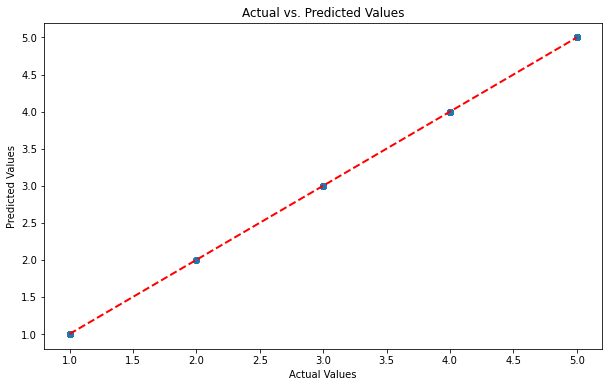

In [45]:
# Visualize actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [50]:
# Ordinal regression

from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop rows with missing values
df_regr_filtered.dropna(inplace=True)

# define X and y
X = df_regr_filtered[[
    'parking_entrance,_counts',
    'motorcycle_parking,_counts',
    'dentist,_counts',
    'pharmacy,_counts',
    'waste_basket,_counts',
    'theatre,_counts',
    'drinking_water_counts',
    'clock,_counts',
    'recycling_counts',
    'fuel_counts',
    'post_office,_counts',
]]
y = df_regr_filtered['review_rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert 'review_rating' to integer type for ordinal regression
encoder = OrdinalEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).flatten()

# Initialize the ordinal logistic regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train_encoded)

# Make predictions on the test data
y_pred_encoded = model.predict(X_test)

# Convert predicted values back to original scale
y_pred = encoder.inverse_transform(y_pred_encoded.reshape(-1, 1)).flatten()

# Print model coefficients
print("Coefficients:", model.coef_)

# Print model intercept
print("Intercept:", model.intercept_)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Coefficients: [[-3.25501063e-02  3.90402541e-01 -7.63630850e-01 -1.26696524e+00
   3.25792456e-02 -1.83093934e-01  8.37925329e-02 -2.46291598e-01
   3.22338961e-03 -2.82540246e-01 -1.28050357e-01]
 [-3.45689925e-01 -6.22497065e-01  5.46411866e-01  5.08894116e-02
   2.49938888e-02 -6.60355618e-01  6.10671852e-03  1.82567745e-01
  -1.30582228e-01 -2.37238540e-01 -3.44486649e-01]
 [ 7.90389510e-02 -5.74339516e-01  4.29827120e-01  7.06476986e-01
  -4.77769469e-02 -9.73769543e-01 -2.21833475e-01 -6.55532650e-02
  -6.98491285e-04 -7.34583950e-02 -1.82777060e-01]
 [ 1.20751683e-01 -3.46496100e-01 -6.13115436e-02  1.10353026e+00
  -4.44684462e-02 -3.75405722e-01  2.27692441e-02 -5.40719808e-02
  -3.74505959e-02 -2.02541713e-01 -5.27964869e-02]
 [-6.74833712e-02 -4.02408209e-01  3.66816681e-01  4.99639867e-01
  -1.65711892e-02  2.55447302e-01 -9.60473007e-02  1.23312606e-01
   2.70274935e-03 -2.04025122e-01  1.89067773e-01]]
Intercept: [ 0.02530539 -1.91342344 -2.21847887 -1.87871164 -0.1994768

c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


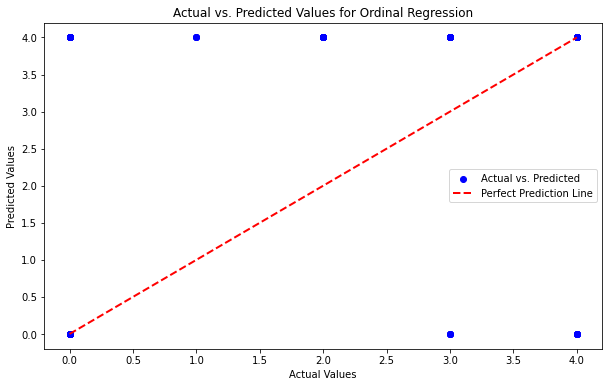

In [51]:
import matplotlib.pyplot as plt

# Visualize actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_encoded, y_pred_encoded, marker='o', color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test_encoded), max(y_test_encoded)], [min(y_test_encoded), max(y_test_encoded)],
         linestyle='--', color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Values for Ordinal Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
